<h1>Sea Level Predictor</h1>

For this project, I will anaylize a dataset of the global average sea level change since 1880. I'll use the data to predict the sea level change through year 2050.

<hr/>

<h2>Tasks</h2>

I will use the data provided from the 'epa-sea-level.csv' to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
    * Plot the line of best fit over the top of the scatter plot. 
    * Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
    * Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

<hr/>


<h3>1. Import Pandas, Numpy, Matplotlib.pyplot, Scipy.stats, Seaborn, and Sea-Level Data </h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\epa-sea-level.csv')

<hr/>

<b>EDA (Insights, Clean, Relationship Analysis)</b>

In [3]:
#Check data layout: 
df.head(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN


In [4]:
#Check data volume
df.shape

(134, 5)

In [5]:
#Check for null values: 
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

In [6]:
#Check dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [7]:
#Check statisical significance
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


<b>Pre-Summary Analysis:</b>

<blockquote>Incoming...</blockquote>

<b>Cleaning Data</b>

In [13]:
#Rename the columns:
df = df.rename(columns=({
    'CSIRO Adjusted Sea Level': 'c_adj_sea_level',
    'Lower Error Bound': 'low_err_bound', 
    'Upper Error Bound': 'up_err_bound',
    'NOAA Adjusted Sea Level': 'n_adj_sea_level'
}))

In [14]:
df = df.rename(columns=({'Year': 'year'}))

In [15]:
df.head()

,year,c_adj_sea_level,low_err_bound,up_err_bound,n_adj_sea_level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [16]:
#Fill NaN values: 
df.fillna(method='bfill',inplace=True)

In [17]:
df.tail()

,year,c_adj_sea_level,low_err_bound,up_err_bound,n_adj_sea_level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


<hr/>

<h3>2. Create Scatter Plot</h3>

* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

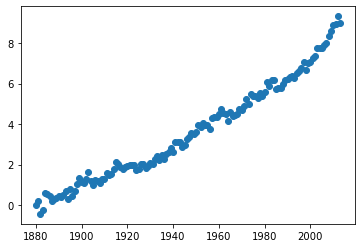

In [39]:
fig, ax = plt.subplots()
plt.scatter(df.year, df.c_adj_sea_level)

<hr/>

<h3>3. Plot First 'Line of Best Fit'</h3>

* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
    * Plot the line of best fit over the top of the scatter plot.
    * Make the line go through the year 2050 to predict the sea level rise in 2050.


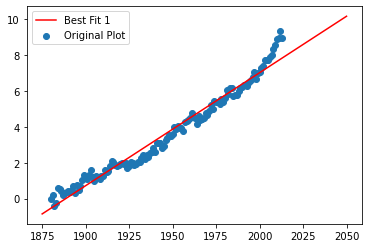

In [28]:
import numpy as np

#Create a series ofs year upto 2050.
y2k50 = np.arange(1875, 2051)

#Find the slope and y-intercept: 
slope, intercept, r_value, p_value, std_err = linregress(df.year, df.c_adj_sea_level)

#Plot Line of best fit: 
ax = plt.scatter(df.year, df.c_adj_sea_level, label='Original Plot')
plt.plot(y2k50, intercept + slope * y2k50, 'r', label='Best Fit 1')
plt.legend()


</hr>

<h3>4. Plot Second 'Line of Best Fit'</h3>

* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
    * Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.


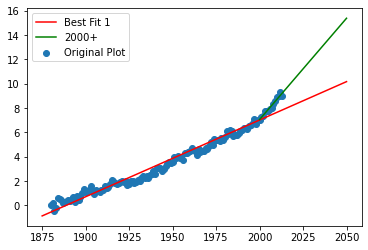

In [35]:
y2k = df[df.year >= 2000]
slopeY, interceptY, rY, pY, std_errY = linregress(y2k.year, y2k.c_adj_sea_level)
y2k502 = np.arange(2000,2051)
ax = plt.scatter(df.year, df.c_adj_sea_level, label='Original Plot')
plt.plot(y2k50, intercept + slope * y2k50, 'r', label='Best Fit 1')
plt.plot(y2k502, interceptY + slopeY * y2k502, 'g', label = '2000+')
plt.legend()

<hr/>

<h3>5. Add Labels and Title</h3>

* The x label should be "Year". 
* The y label should be "Sea Level (inches)". 
* The title should be "Rise in Sea Level".

Text(0.5, 1.0, 'Rise in Sea Level')

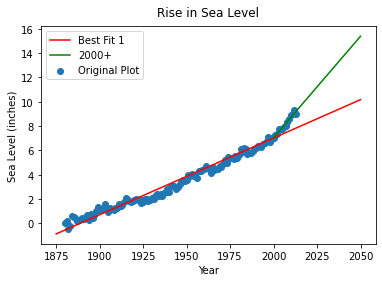

In [38]:
y2k = df[df.year >= 2000]
slopeY, interceptY, rY, pY, std_errY = linregress(y2k.year, y2k.c_adj_sea_level)
y2k502 = np.arange(2000,2051)
ax = plt.scatter(df.year, df.c_adj_sea_level, label='Original Plot')
plt.plot(y2k50, intercept + slope * y2k50, 'r', label='Best Fit 1')
plt.plot(y2k502, interceptY + slopeY * y2k502, 'g', label = '2000+')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level', pad=10)

<hr/>

<h3> Full Code</h3>

```python

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')
    df = df.rename(columns=({
      'CSIRO Adjusted Sea Level': 'c_adj_sea_level',
      'Lower Error Bound': 'low_err_bound', 
      'Upper Error Bound': 'up_err_bound',
      'NOAA Adjusted Sea Level': 'n_adj_sea_level',
      'Year': 'year'}))    


    # Create scatter plot
    fig, ax = plt.subplots()
    plt.scatter(df.year, df.c_adj_sea_level)


    # Create first line of best fit
    y2k50 = np.arange(df.year.min(), 2051)
    slope, intercept, r_value, p_value, std_err = linregress(
      df.year, df.c_adj_sea_level)
    plt.scatter(df.year, df.c_adj_sea_level, label = 'Original Plot')
    plt.plot(y2k50, intercept + slope * y2k50, 'r', label='Best Fit 1')


    # Create second line of best fit
    y2k = df[df.year >= 2000]
    slopeY, interceptY, rY, pY, std_errY = linregress(
      y2k.year, y2k.c_adj_sea_level)
    y2k502 = np.arange(2000,2051)
    plt.plot(y2k502, interceptY + slopeY * y2k502, 'g', label = 'Best Fit 2')
    plt.legend()


    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level', pad=10)

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

```